## Final Project Submission

Please fill out:
* Student name: Tara Mullin
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger 
* Blog post URL:


## Business Understanding - Defining Objectives & Problem

* **Goal** : Predict the housing prices based on features in the dataset, understand how factors influence price to determine which are most impactful

* business stakeholders: how much/how many? which category? which group?

#1) Understand the problem. Look at each variable and perform analysis to their understand importance for the goal
#2) Univariable study. focus on the dependent variable ('price') to try to know a little bit more about it
#3) Bivariate and multivariate study. analyze how the dependent variable and independent variables relate

## Obtain Data

* gather and scrape the data necessary for the project, for example:
    * query from database or API
    * extract from another file
    * generate data

### Import Python Libraries needed for project

In [2]:
import pandas as pd #data processing
from pandas.tools.plotting import scatter_matrix #data processing, scatter matrix
import numpy as np #linear algebra
import statsmodels as sm #python module that provides classes and functions for the estimation of many different stats models, conducting statistical test, and statistical data exploration
from statsmodels.api import formula
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import seaborn as sns #data visualization

### Import, read and analyze the dataset (df)

In [3]:
df = pd.read_csv('kc_house_data.csv')

## Data Cleaning

* Fix inconsistencies within the data and handle the missing values.

    * examine datatypes
    * find missing values (null values)
    * look for filler/placeholder data
    * columns we don't need --> extra indices
    * drop sparse columns
    
    * filtering lines
    * extracting columns
    * replacing values
    * handle missing values
    * converting formates


In [4]:
df.info

<bound method DataFrame.info of                id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014   

In [5]:
df.shape #analyzing the number of rows and columns in the data set

(21597, 21)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* Looking at 5 point statistics with df_houseprices.describe( )

Immediately I'm noticing that max bedrooms is 33. This seems unlikely, so let's investigate more.

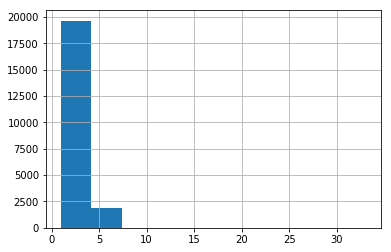

In [8]:
df['bedrooms'].hist()

In [9]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [10]:
df.loc[df['bedrooms']==33] #.loc[] to select the single row

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [11]:
# Since there is only 1 entry with 33 bedrooms, and the other data for this house doesn't make
# sense for a house with 33 rooms (i.e. 1.75 bathrooms, 1,620 sqft, and $640,000), 33 may be a place holder
# I decided to drop the row
#df['bedrooms'] = df['bedrooms'].drop(df['bedrooms'].idxmax(axis=0))
df = df[df.bedrooms !=33] #dropping the row

In [12]:
# checking that that row was dropped
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

## Data Types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


### sqft_basement is an object...

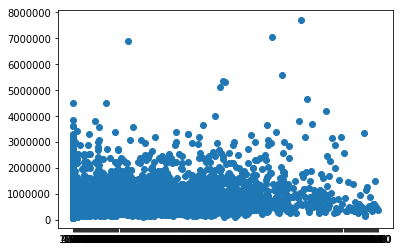

In [14]:
plt.scatter(df.sqft_basement, df.price) 
plt.show()

In [15]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
840.0        83
580.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
861.0         1
248.0         1
1275.0        1
2360.0        1
556.0         1
243.0         1
207.0         1
768.0         1
2570.0        1
295.0         1
2850.0        1
508.0         1
1135.0        1
1008.0        1
2400.0        1
2350.0        1
65.0          1
2050.0        1
784.0         1
2730.0        1
1525.0        1
1880.0        1
506.0         1
2610.0        1
417.0         1
666.0         1
792.0         1
1920.0        1
1770.0        1
2190.0        1
Name: sqft_basement, Len

In [16]:
print('Percentage of missing sqft_basement vales:', len(df[df.sqft_basement == '?'])/len(df))

Percentage of missing sqft_basement vales: 0.02102241155769587


It appears that sqft_basement is numeric data, but there are over 450 entries with "?" entries, making it impossible to simply convert from string to numeric. The rows containing '?' are only 2% of the data, so I decided to drop them.

In [17]:
df = df[df.sqft_basement !='?'] #dropping the row

In [18]:
df.sqft_basement = df.sqft_basement.astype('float32') #converting to numerical

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 21 columns):
id               21142 non-null int64
date             21142 non-null object
price            21142 non-null float64
bedrooms         21142 non-null int64
bathrooms        21142 non-null float64
sqft_living      21142 non-null int64
sqft_lot         21142 non-null int64
floors           21142 non-null float64
waterfront       18803 non-null float64
view             21081 non-null float64
condition        21142 non-null int64
grade            21142 non-null int64
sqft_above       21142 non-null int64
sqft_basement    21142 non-null float32
yr_built         21142 non-null int64
yr_renovated     17388 non-null float64
zipcode          21142 non-null int64
lat              21142 non-null float64
long             21142 non-null float64
sqft_living15    21142 non-null int64
sqft_lot15       21142 non-null int64
dtypes: float32(1), float64(8), int64(11), object(1)
memory usage: 3.5+ MB

#### Possible categorical data stored as integers:
* zip codes and waterfront
* log and lat?
* bedrooms, bathrooms, floors, grade, view could all be categorical, since there are discrete options, but I could also see how an increase in these would likely positively impact the price

I'll look into these more later...

### Detecting & Dealing with Null Values

* Examine how many, how prevalent. Is the missing data random or does it have a pattern?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 21 columns):
id               21142 non-null int64
date             21142 non-null object
price            21142 non-null float64
bedrooms         21142 non-null int64
bathrooms        21142 non-null float64
sqft_living      21142 non-null int64
sqft_lot         21142 non-null int64
floors           21142 non-null float64
waterfront       18803 non-null float64
view             21081 non-null float64
condition        21142 non-null int64
grade            21142 non-null int64
sqft_above       21142 non-null int64
sqft_basement    21142 non-null float32
yr_built         21142 non-null int64
yr_renovated     17388 non-null float64
zipcode          21142 non-null int64
lat              21142 non-null float64
long             21142 non-null float64
sqft_living15    21142 non-null int64
sqft_lot15       21142 non-null int64
dtypes: float32(1), float64(8), int64(11), object(1)
memory usage: 3.5+ MB

* RangeIndex = 21,597 
* Note missing values in **waterfront**,  **view**, & **yr_renovated**

In [21]:
# inspecting null values
total = df.isnull().sum().sort_values(ascending=False)
total

yr_renovated     3754
waterfront       2339
view               61
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [22]:
# calculate percentage of null values in waterfront
df.waterfront.isna().sum() / df.shape[0]

0.110632863494466

* 11% of our data is null in **waterfront**

In [23]:
# how to address this?
df.waterfront.unique()

array([nan,  0.,  1.])

Approaches to handling null values:
* replace null values with mean
* drop the column
* drop the rows

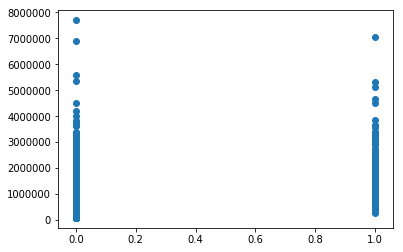

In [24]:
x = df['waterfront']
y = df['price']

plt.scatter(x, y)
plt.show()

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


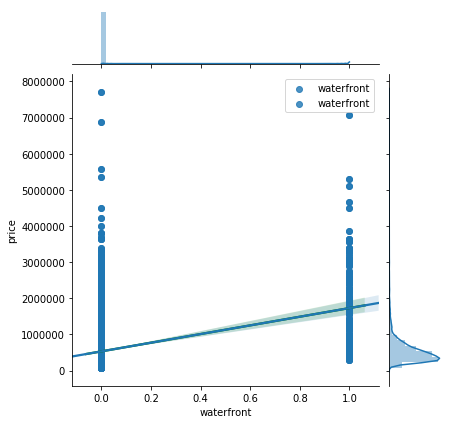

In [25]:
for column in ['waterfront']:
    sns.jointplot(x=column, y="price",
                 data=df,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df[column], df.price, label=column)
    plt.legend()
    plt.show()

In [26]:
#DateFrame that contains only entries that have data for waterfront
df_split_waterfront = df[df.waterfront == df.waterfront]
df_split_waterfront.shape

(18803, 21)

In [27]:
print(df_split_waterfront[df_split_waterfront.waterfront==0].shape, df_split_waterfront[df_split_waterfront.waterfront==1].shape)

(18661, 21) (142, 21)


In [28]:
df_split_waterfront[df_split_waterfront.waterfront==0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.866100e+04,1.866100e+04,18661.000000,18661.000000,18661.000000,1.866100e+04,18661.000000,18661.0,18607.000000,18661.000000,18661.000000,18661.000000,18661.000000,18661.000000,15356.000000,18661.000000,18661.000000,18661.000000,18661.000000,18661.000000
mean,4.592226e+09,5.327856e+05,3.372810,2.112976,2074.183967,1.501773e+04,1.493543,0.0,0.203741,3.408928,7.652591,1786.525427,287.658539,1971.135202,78.788942,98077.489148,47.560205,-122.213479,1982.689031,12711.899148
std,2.876030e+09,3.453126e+05,0.900142,0.764442,909.294580,4.098481e+04,0.539589,0.0,0.698835,0.649283,1.166814,825.469273,436.999908,29.329788,388.734251,53.400894,0.138938,0.140580,681.279150,27471.377637
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.905082e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.604000e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.229000,1840.000000,7616.000000
75%,7.331900e+09,6.385000e+05,4.000000,2.500000,2540.000000,1.059000e+04,2.000000,0.0,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.125000,2350.000000,10038.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [29]:
df_split_waterfront[df_split_waterfront.waterfront==1].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.420000e+02,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,141.000000,142.000000,142.000000,142.000000,142.000000,142.000000,117.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,4.478870e+09,1.731020e+06,3.373239,2.720070,3265.415493,25716.830986,1.626761,1.0,3.780142,3.542254,8.852113,2516.436620,748.978882,1962.521127,458.871795,98096.197183,47.540779,-122.276063,2697.485915,22733.514085
std,2.862214e+09,1.158149e+06,1.101959,1.132797,1668.837423,45039.417864,0.550424,0.0,0.561785,0.740167,1.798136,1296.927545,809.891968,26.916398,841.405244,60.669228,0.112793,0.124645,812.719502,23172.405390
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,0.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,8.212500e+05,3.000000,1.812500,2082.500000,11533.000000,1.000000,1.0,4.000000,3.000000,8.000000,1560.000000,0.000000,1942.000000,0.000000,98040.000000,47.453975,-122.376000,2140.000000,11991.500000
50%,3.692780e+09,1.590000e+06,3.000000,2.500000,2935.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2240.000000,580.000000,1960.000000,0.000000,98074.500000,47.548750,-122.270000,2710.000000,16260.500000
75%,7.494475e+09,2.300000e+06,4.000000,3.250000,4127.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1270.000000,1984.750000,0.000000,98155.000000,47.607550,-122.209250,3200.000000,24537.500000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,4820.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


*cheapest house on the waterfront is almost more expensive than a quarter of the houses not on the waterfront.



In [30]:
print('Percentage of enteries with waterfront data:', len(df_split_waterfront)/len(df))
print('Percentage of houses on the waterfront:', len(df_split_waterfront[df_split_waterfront.waterfront==1])/len(df_split_waterfront))


Percentage of enteries with waterfront data: 0.889367136505534
Percentage of houses on the waterfront: 0.007551986385151306


* Since 99.2% of the valid values in waterfront are false, I'll drop this column. It provides little insight into price since there are so few true values


#### Looking more at 'view'

In [31]:
df['view'].value_counts()

0.0    19017
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

* It seems strange that 90% of houses aren't viewed before they are sold?
* I am deciding to drop 'view' due to missing values, that I'm not confident in the validity of the data, and that logically I don't know how the number of times a house has been viewed actually influences price.

In [32]:
df = df.drop('waterfront', axis=1) #drop waterfront column
df = df.drop('view', axis=1) #drop view column
df = df.drop('id', axis=1) #drop id column, this won't help us predict house price

## Data Exploration

*Form hypotheses about your defined problem by visually analyzing the data and understanding basic statistics


### Univariable Study: Basic Statistics of our Target Variable

In [33]:
df['price'].describe()

count    2.114200e+04
mean     5.405060e+05
std      3.680831e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The minimum is 78,000 and the maximum is 7,700,000. This seems plausible, no red flags off the bat.

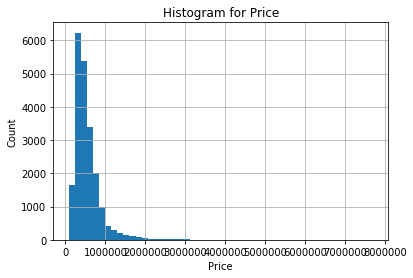

In [34]:
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram for Price')
df.price.hist(bins = 50)

### Bivariate and multivariate study: Basic statistics of our predictors

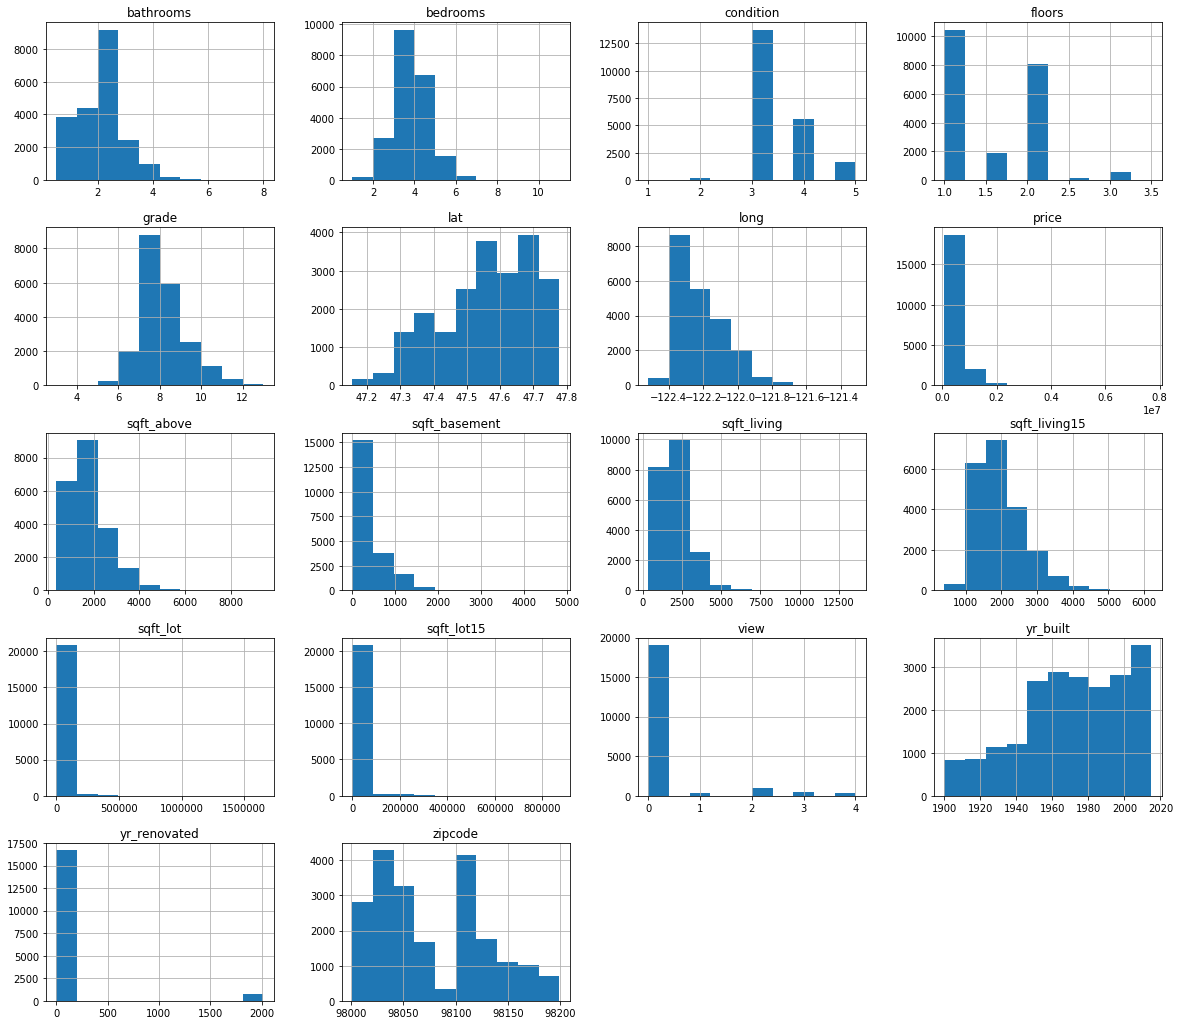

In [35]:
df.hist(figsize = (20,18));

In [162]:
# bedrooms and grade are perhaps closest to a normal distribution, but essentially all variables
# break the normal assumption.
# There is a lot of skewness present, indicating possible outliers

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


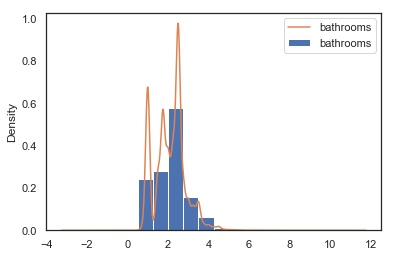

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


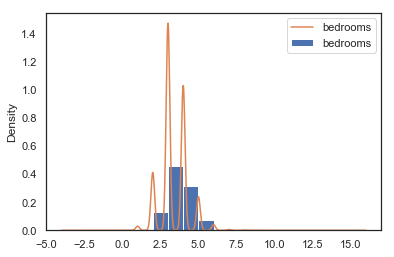

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


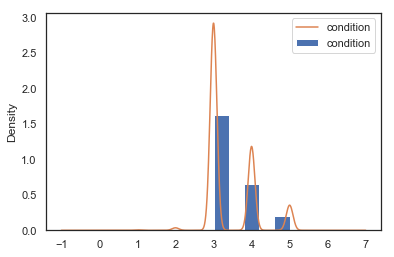

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


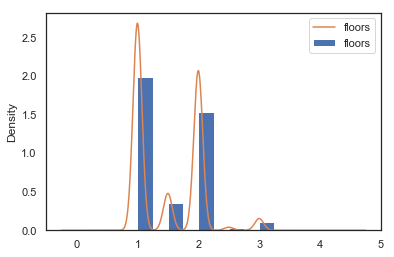

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


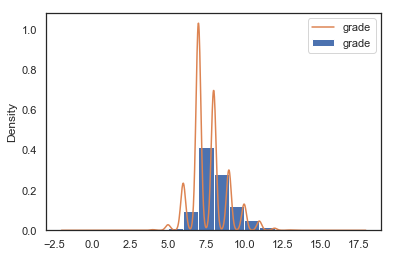

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


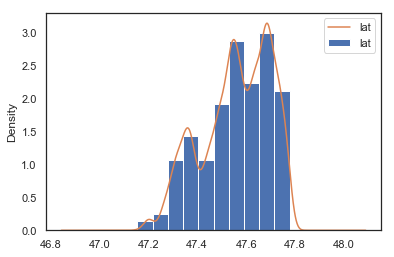

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


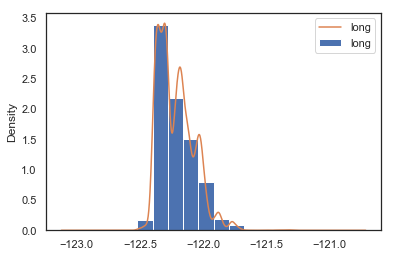

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


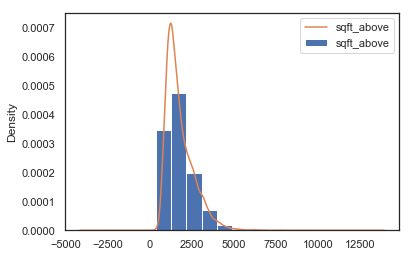

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


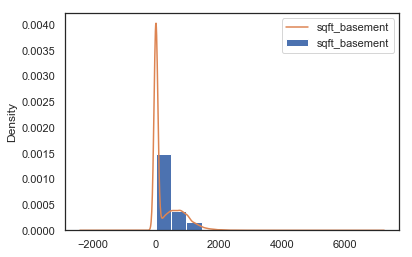

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


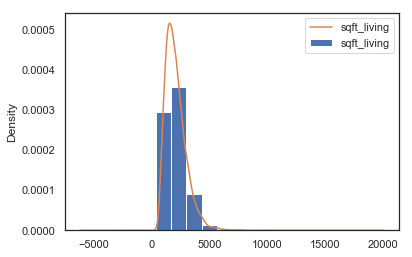

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


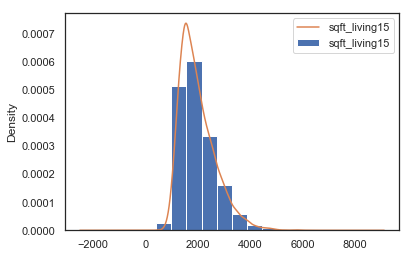

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


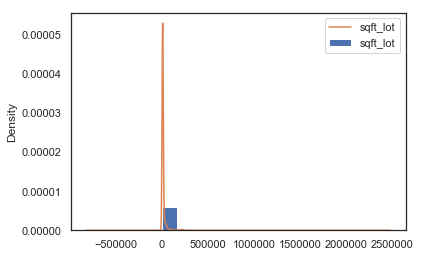

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


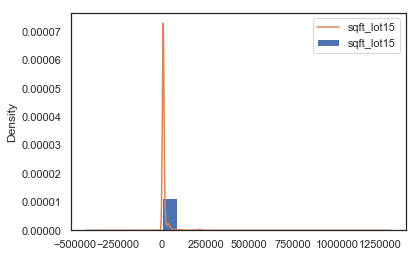

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


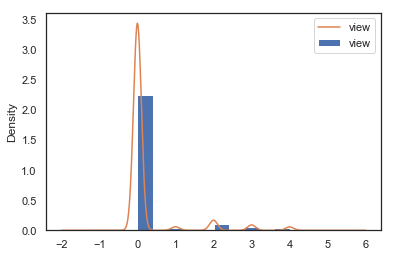

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


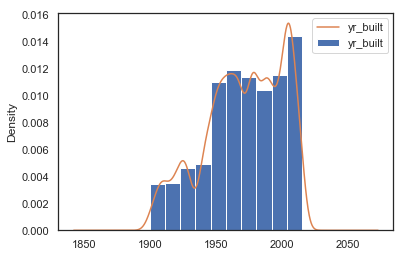

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


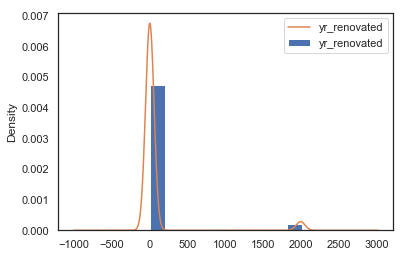

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


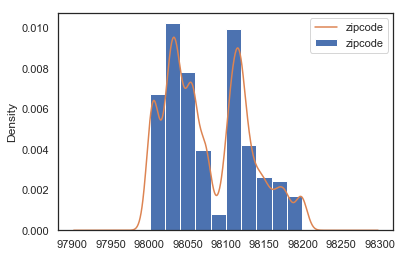

In [163]:
for column in ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 
               'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 
               'yr_built', 'yr_renovated', 'zipcode']:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


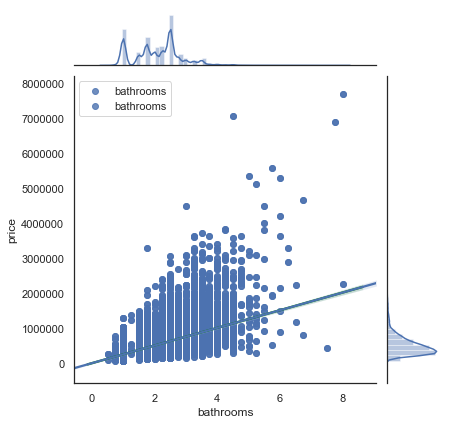

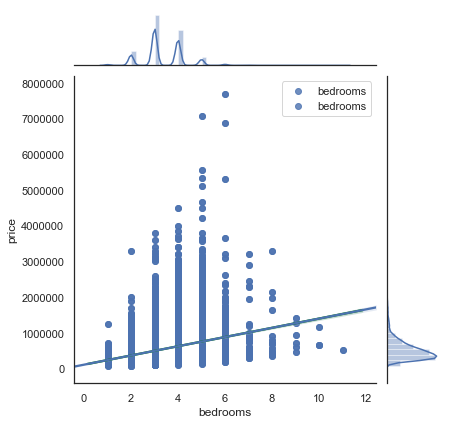

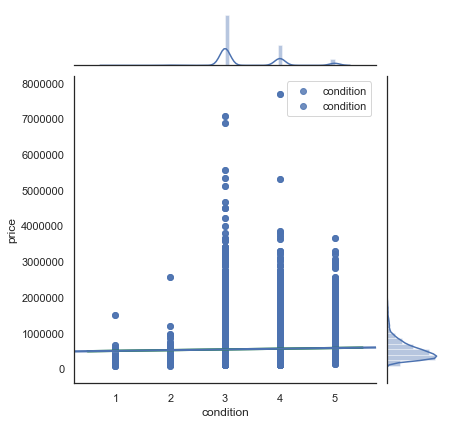

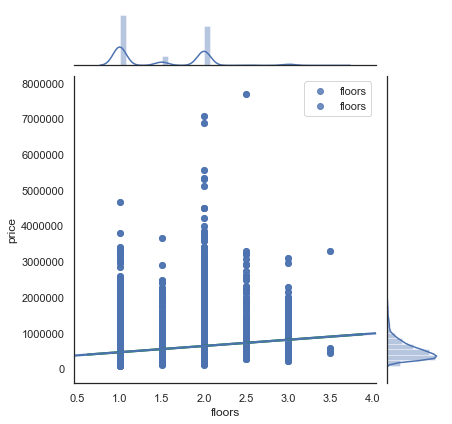

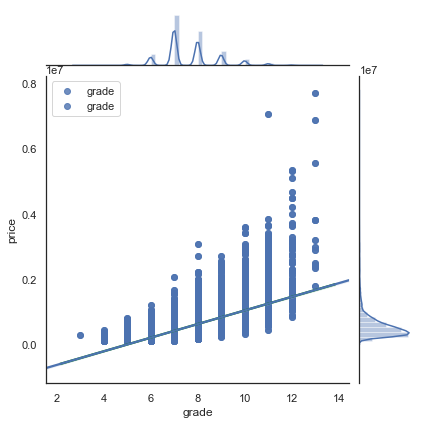

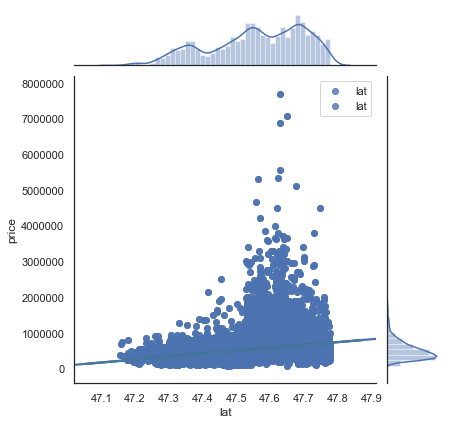

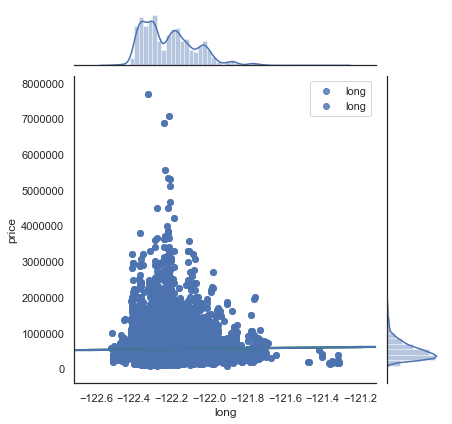

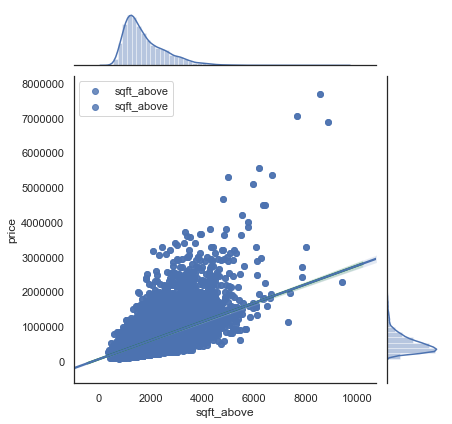

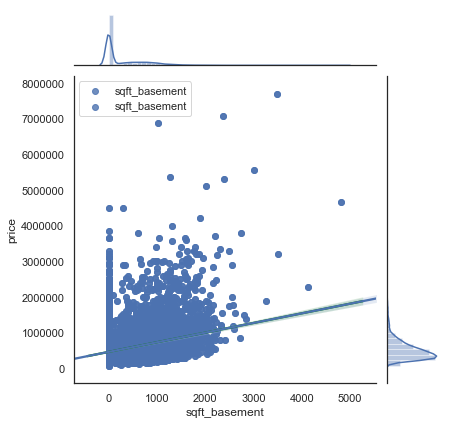

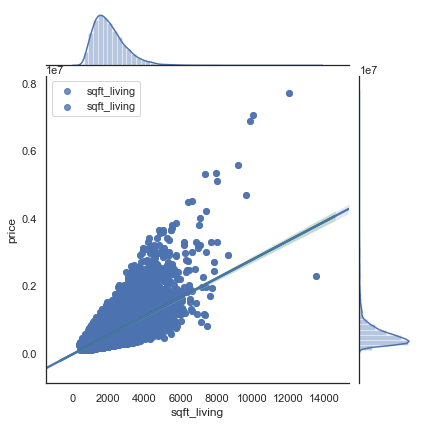

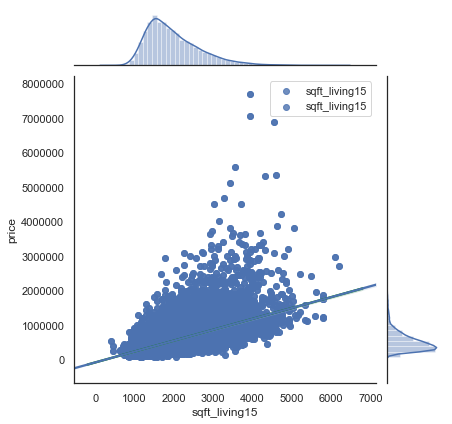

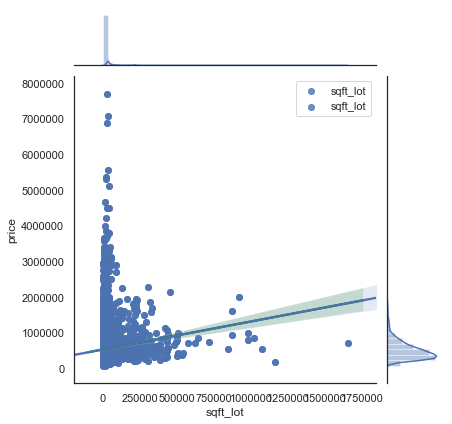

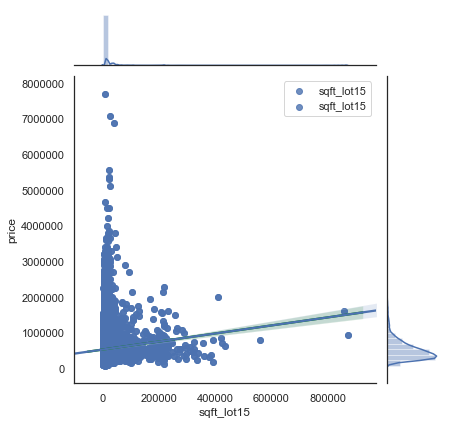

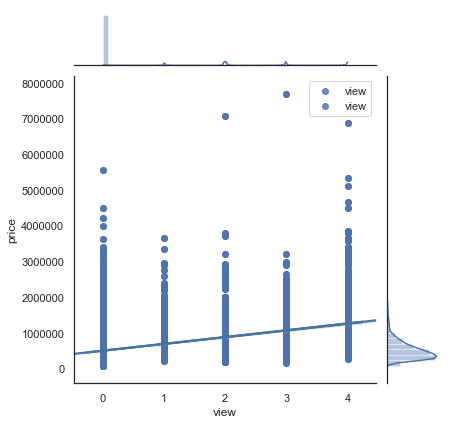

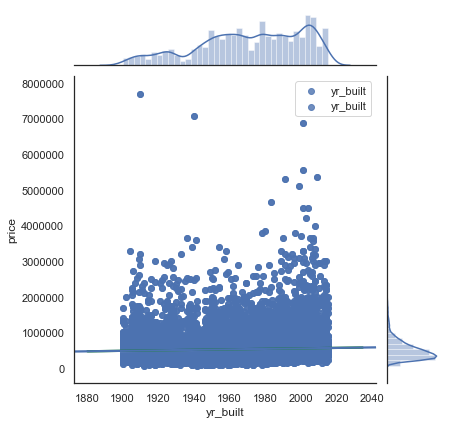

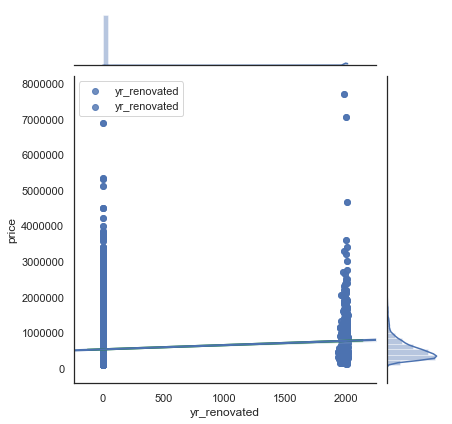

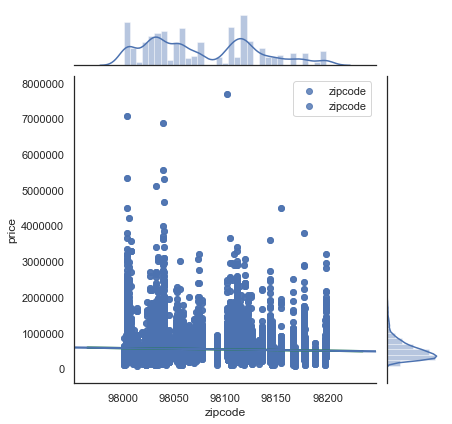

In [164]:
for column in ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 
               'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 
               'yr_built', 'yr_renovated', 'zipcode']:
    sns.jointplot(x=column, y="price",
                 data=df,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df[column], df.price, label=column)
    plt.legend()
    plt.show()

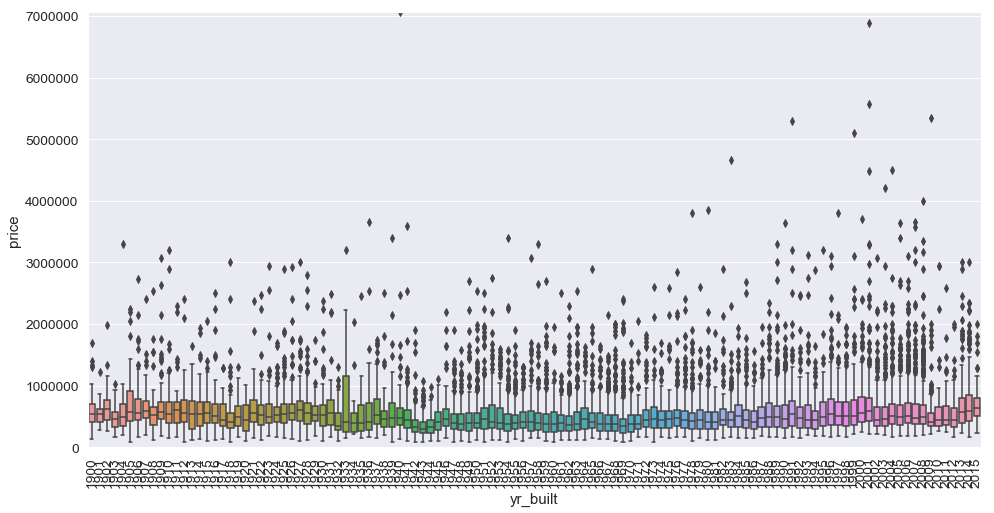

In [169]:
# benefit of box plot: show outliers and where majority of your data lies
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=df)
fig.axis(ymin=0, ymax=7060000);
plt.xticks(rotation=90);

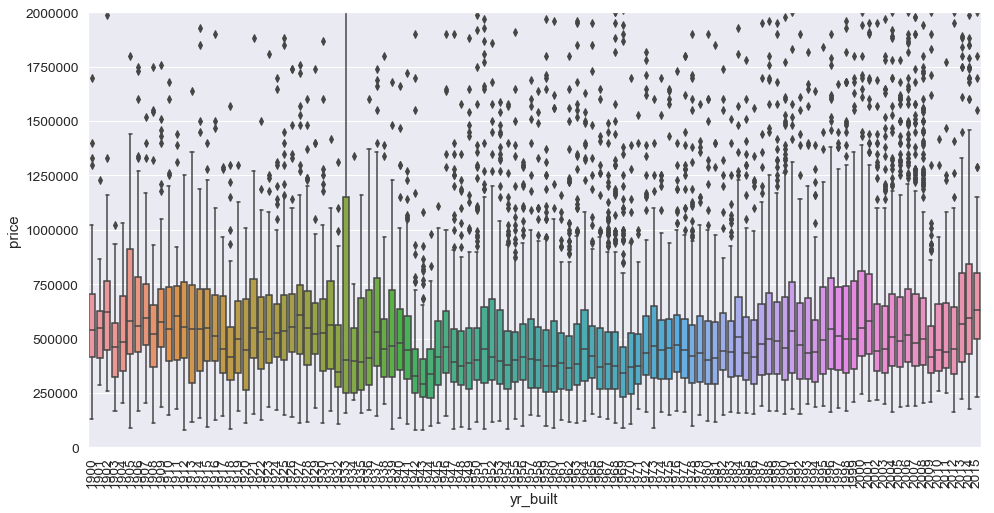

In [170]:
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=df)
fig.axis(ymin=0, ymax=2000000);
plt.xticks(rotation=90);

### Visual Analysis of Predictors

##### Promising features:
Bathrooms:
* Possible positive relationship between number of bathrooms and price - this maskes sense
* However, there appears to be heteroscedasticity around the simple linear regression line
* The data is also skewed to the right 
* Even though it is sort of categorical, an increase in teh number of bathrooms looks to be associated with a higher price, so for now I'll leave it as continuous, but it is non-normal and multi modal

Bedrooms:
* Possible positive relationship with price - this maskes sense
* However, there appears to be heteroscedasticity around the simple linear regression line
* The data is also skewed to the right
* Even though it is sort of categorical, an increase in the number of bedrooms looks to be associated with a higher price, so for now I'll leave it as continuous, but it is non-normal and multi modal

sqft_living:
* Likely positive relationship with price - this maskes sense
* Lot's of heteroscedasticity around the simple linear regression line
* The data is skewed to the right

sqft_above:
* Likely positive relationship with price - this maskes sense
* Lot's of heteroscedasticity around the simple linear regression line
* The data is also skewed to the right

sqft_basement:
* lot's of zeros - don't think a log transforamtion will work in this case -> square root?
* Likely positive relationship with price - this maskes sense
* Lot's of heteroscedasticity around the simple linear regression line
* The data is also skewed to the right

sqft_living15:
* Likely positive relationship with price - this maskes sense
* Lot's of heteroscedasticity around the simple linear regression line
* The data is skewed to the right

Grade and floors: 
* Appear to have positive relationships with price, but not normally distributed due to it's "categorical" like structure, appears multi-modal

Sqft_lot and sqft_lot15: 
* Have many 0 values, this makes sense since some homes may be condos, I'm not sure how to handle these in the model...

lat and long:
* Not sure what to do with these...

##### Features to be dropped:
Condition, yr_built, yr_renovated are all very non-normal and don't show much of a relationship with price

Conclusions:
*Our key assumptions for regression at this stage don't hold so strong. There are pre-processing techniques we can apply to further clean the data to make it more suitable for modeling


### Checking for Multicollinearity

* check that the data does not have high multicollinearity, or correlation/covariance between our predictor columns

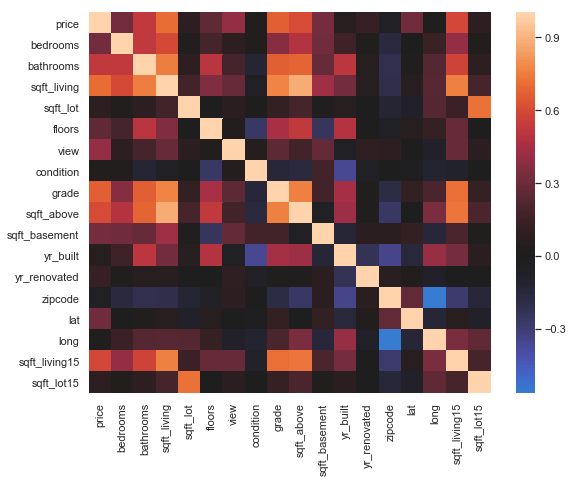

In [165]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df.corr(), center = 0);

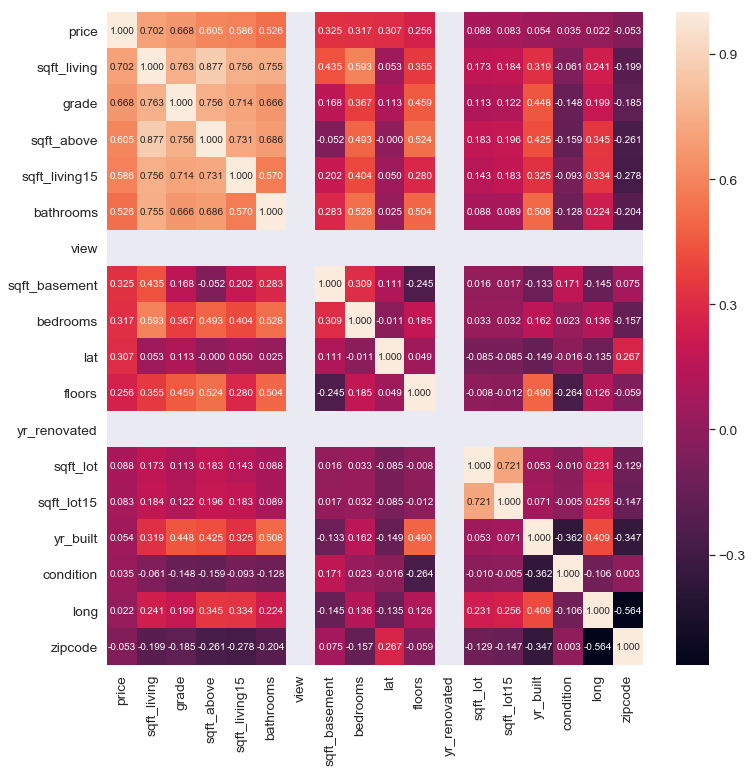

In [166]:
#Annotated heatmap to associate values to the variables
#https://seaborn.pydata.org/examples/heatmap_annotation.html
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 12))
hm = sns.heatmap(cm,annot=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

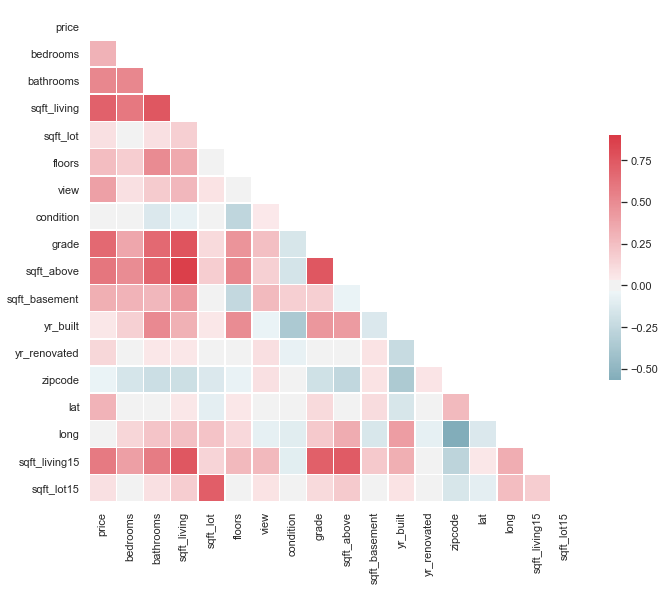

In [110]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [207]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.316573,0.525899,0.702340,0.087940,0.256372,0.397182,0.035264,0.667751,0.605167,0.325003,0.054471,0.128231,0.306502,0.022112,0.586441,0.083196
bedrooms,0.316573,1.000000,0.527526,0.593340,0.033418,0.184979,0.082885,0.022564,0.366745,0.492695,0.309298,0.162247,0.020032,-0.011191,0.135692,0.403859,0.031707
bathrooms,0.525899,0.527526,1.000000,0.755275,0.087880,0.504063,0.187244,-0.127979,0.666489,0.686453,0.282712,0.508401,0.051730,0.025015,0.224466,0.570123,0.088828
sqft_living,0.702340,0.593340,0.755275,1.000000,0.172937,0.354675,0.283792,-0.061245,0.763098,0.876679,0.434598,0.319448,0.054285,0.053009,0.240782,0.756387,0.184460
sqft_lot,0.087940,0.033418,0.087880,0.172937,1.000000,-0.007531,0.072665,-0.009646,0.113397,0.183456,0.015540,0.052760,0.003488,-0.085449,0.230578,0.143421,0.720648
floors,0.256372,0.184979,0.504063,0.354675,-0.007531,1.000000,0.027735,-0.264217,0.459202,0.524207,-0.245123,0.489647,0.003245,0.049018,0.125890,0.280264,-0.011558
view,0.397182,0.082885,0.187244,0.283792,0.072665,0.027735,1.000000,0.045506,0.250008,0.166898,0.276534,-0.054428,0.098944,0.006187,-0.076320,0.280927,0.072793
condition,0.035264,0.022564,-0.127979,-0.061245,-0.009646,-0.264217,0.045506,1.000000,-0.148466,-0.159210,0.170923,-0.362069,-0.062242,-0.015701,-0.106205,-0.093398,-0.004826
grade,0.667751,0.366745,0.666489,0.763098,0.113397,0.459202,0.250008,-0.148466,1.000000,0.756379,0.168043,0.448108,0.016900,0.113407,0.199170,0.713569,0.121915
sqft_above,0.605167,0.492695,0.686453,0.876679,0.183456,0.524207,0.166898,-0.159210,0.756379,1.000000,-0.052266,0.425160,0.020782,-0.000307,0.344519,0.731005,0.195630


In [208]:
abs(df.corr())>0.8

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False


*sqft_living is highly correlated with sqft_above, which makes sense. 

*There is duplicate info by keeping sqft_living and sqft_above and sqft_basement

*the distribution for sqft_basement is very strange, and I think it's most important to understand the total square footage and whether or not the house has a basement, so I may drop sqft_above and create a boolean for has basement

## Feature Engineering

* Select important features and construct more meaningful ones using the raw data that you have
* transformation then scaling

* log transformation: reduces skewness, reduce variability of data,
* min-max scaling: brings values between 0 and 1
* standardization: does NOT make the data more normal, but it will change the mean and standard error
* mean normalization: values between -1 and 1 and a mean of 0
* skewness and kurtosis, if skewed you can start normalizing it (log transformation --> but not with tons of zeros)

#### Categorical Data Stored as Numeric

In [35]:
df.zipcode = df.zipcode.astype('str')

latitude?

#### A for-loop to look at some results for each linear regression model
* run a simple OLS regression between (continuous) independent and dependent variables

In [40]:
import statsmodels.formula.api as smf

In [41]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

price~bedrooms
------------------------------
['bedrooms', 0.10021824588099015, 105105.30020456141, 129154.68765275997, 0.0]
price~bathrooms
------------------------------
['bathrooms', 0.2765694115784113, 7522.067917900262, 251871.3580043978, 0.0]
price~sqft_living
------------------------------
['sqft_living', 0.4932807937659991, -45151.56483712692, 281.43861622692765, 0.0]
price~sqft_lot
------------------------------
['sqft_lot', 0.007733385323482778, 528655.266755299, 0.7854649067481476, 1.4274879993770415e-37]
price~floors
------------------------------
['floors', 0.06572649153275978, 279131.46125707874, 174994.64678266004, 0.0]
price~condition
------------------------------
['condition', 0.0012435338573831833, 472458.14271365805, 19956.28104406716, 2.9167752799905927e-07]
price~grade
------------------------------
['grade', 0.4458916252519133, -1062461.9666940714, 209310.91710216698, 0.0]
price~sqft_above
------------------------------
['sqft_above', 0.3662270242827216, 59434.42

* All the models appear to be statistically significant, as indicated by the pvalue < 0.05
* The features with the highest R^2 values are:
    - sqft_living, R^2 = 0.493
    - grade, R^2 = 0.446
    - sqft_above, R^2 = 0.366
    - sqft_living15, R^2 = 0.344
    - bathrooms, R^2 = 0.277
    - sqft_basement, R^2 = 0.106
    - bedrooms, R^2 = 0.100
    - lat, R^2 = 0.094

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 19 columns):
date             21142 non-null object
price            21142 non-null float64
bedrooms         21142 non-null int64
bathrooms        21142 non-null float64
sqft_living      21142 non-null int64
sqft_lot         21142 non-null int64
floors           21142 non-null float64
view             21081 non-null float64
condition        21142 non-null int64
grade            21142 non-null int64
sqft_above       21142 non-null int64
sqft_basement    21142 non-null bool
yr_built         21142 non-null int64
yr_renovated     17388 non-null float64
zipcode          21142 non-null object
lat              21142 non-null float64
long             21142 non-null float64
sqft_living15    21142 non-null int64
sqft_lot15       21142 non-null int64
dtypes: bool(1), float64(7), int64(9), object(2)
memory usage: 3.1+ MB


In [42]:
features = df.iloc[:, 1:19]
to_drop = ["sqft_above", "sqft_lot", "sqft_lot15", "yr_built", "yr_renovated","lat","long", 'condition']
features = features.drop(to_drop, axis=1)
features.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_basement,zipcode,sqft_living15
0,221900.0,3,1.00,1180,1.0,7,0.0,98178,1340
1,538000.0,3,2.25,2570,2.0,7,400.0,98125,1690
2,180000.0,2,1.00,770,1.0,6,0.0,98028,2720
3,604000.0,4,3.00,1960,1.0,7,910.0,98136,1360
4,510000.0,3,2.00,1680,1.0,8,0.0,98074,1800


### transforming the data

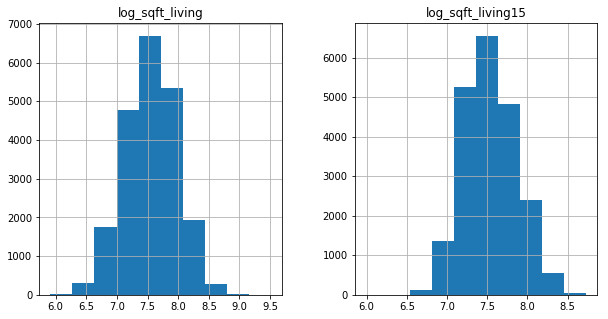

In [43]:
features_transformed = pd.DataFrame([])
features_transformed['log_sqft_living'] = np.log(features['sqft_living'])
features_transformed['log_sqft_living15'] = np.log(features['sqft_living15'])
features_transformed.hist(figsize = [10,5]);

In [44]:
features_transformed.head()

,log_sqft_living,log_sqft_living15
0,7.073270,7.200425
1,7.851661,7.432484
2,6.646391,7.908387
3,7.580700,7.215240
4,7.426549,7.495542


In [45]:
features_transformed['basement_bool'] = df.sqft_basement.astype('bool')

In [46]:
features_transformed.head()

,log_sqft_living,log_sqft_living15,basement_bool
0,7.073270,7.200425,False
1,7.851661,7.432484,True
2,6.646391,7.908387,False
3,7.580700,7.215240,True
4,7.426549,7.495542,False


In [47]:
features = pd.concat([features, features_transformed], axis=1)

In [48]:
features.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_basement,zipcode,sqft_living15,log_sqft_living,log_sqft_living15,basement_bool
0,221900.0,3,1.00,1180,1.0,7,0.0,98178,1340,7.073270,7.200425,False
1,538000.0,3,2.25,2570,2.0,7,400.0,98125,1690,7.851661,7.432484,True
2,180000.0,2,1.00,770,1.0,6,0.0,98028,2720,6.646391,7.908387,False
3,604000.0,4,3.00,1960,1.0,7,910.0,98136,1360,7.580700,7.215240,True
4,510000.0,3,2.00,1680,1.0,8,0.0,98074,1800,7.426549,7.495542,False


### Normalizing the data
* convert numeric columns to the same scale by normalizing

In [50]:
#Example from lesson:
#df.Size = (df.Size - df.Size.mean()) / df.Size.std()
#df.Temperature = (df.Temperature - df.Temperature.mean()) / df.Temperature.std()
#df.Fuel_Price = (df.Fuel_Price - df.Fuel_Price.mean()) / df.Fuel_Price.std()
#df.CPI = (df.CPI - df.CPI.mean()) / df.CPI.std()
#df.Unemployment = (df.Unemployment - df.Unemployment.mean()) / df.Unemployment.std()

In [70]:
df_model_1 = pd.DataFrame([])
df_model_1 = pd.concat([features], axis=1)
df_model_1 = df_model_1.drop("sqft_living", axis =1)
df_model_1 = df_model_1.drop("sqft_living15", axis =1)
df_model_1 = df_model_1.drop("sqft_basement", axis = 1)
df_model_1.head()

,price,bedrooms,bathrooms,floors,grade,zipcode,log_sqft_living,log_sqft_living15,basement_bool
0,221900.0,3,1.00,1.0,7,98178,7.073270,7.200425,False
1,538000.0,3,2.25,2.0,7,98125,7.851661,7.432484,True
2,180000.0,2,1.00,1.0,6,98028,6.646391,7.908387,False
3,604000.0,4,3.00,1.0,7,98136,7.580700,7.215240,True
4,510000.0,3,2.00,1.0,8,98074,7.426549,7.495542,False


In [50]:
df_model_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 9 columns):
price                21142 non-null float64
bedrooms             21142 non-null int64
bathrooms            21142 non-null float64
floors               21142 non-null float64
grade                21142 non-null int64
zipcode              21142 non-null object
log_sqft_living      21142 non-null float64
log_sqft_living15    21142 non-null float64
basement_bool        21142 non-null bool
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 1.5+ MB


### One-Hot Encoding Categorial Data

In [51]:
df_model_1 = pd.get_dummies(df_model_1)

## Predictive Modeling

* Train machine learning models, evaluate the performance, and use them to make predictions

### Initial Model

In [52]:
#Define the problem
outcome = 'price'
predictors = df_model_1.drop('price', axis=1)

In [53]:
from statsmodels.formula.api import ols

In [54]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_1 = ols(formula=formula, data=df_model_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     653.0
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:54:30   Log-Likelihood:            -2.8816e+05
No. Observations:               21142   AIC:                         5.765e+05
Df Residuals:                   21065   BIC:                         5.771e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.643e+06   4.95e+04    -53.350      0.000   -2.74e+06   -2.55e+06
basement_bool[T.True] -4.441e+04   3644.619    -12.186      0.000   -5.16e+04   -3.73e+04
bedrooms              -2.103e+04   2102.635    -10.001      0.000   -2.51e+04   -1.69e+04
bathrooms              5.624e+04   3139.487     17.913      0.000    5.01e+04    6.24e+04
floors                -7.806e+04   3600.024    -21.684      0.000   -8.51e+04    -7.1e+04
grade                  9.671e+04   2111.877     45.795      0.000    9.26e+04    1.01e+05
log_sqft_living        2.556e+05   7693.006     33.223      0.000    2.41e+05    2.71e+05
log_sqft_living15      8.674e+04   7264.280     11.941      0.000    7.25e+04    1.01e+05
zipcode_98001         -2.668e+05   1.07e+04    -24.856      0.000   -2.88e+05   -2.46e+05
zipcode_98002         -1.988e+05   1.43e+04    -13.906      0.000   -2.27e+05   -1.71e+05
zipcode_98003         -2.871e+05   1.21e+04    -23.647      0.000   -3.11e+05   -2.63e+05
zipcode_98004          5.373e+05   1.15e+04     46.554      0.000    5.15e+05     5.6e+05
zipcode_98005          2.195e+04   1.56e+04      1.406      0.160   -8655.093    5.26e+04
zipcode_98006          2.579e+04   9436.539      2.733      0.006    7293.745    4.43e+04
zipcode_98007         -4.015e+04    1.7e+04     -2.366      0.018   -7.34e+04   -6891.885
zipcode_98008          2.364e+04   1.21e+04      1.958      0.050     -19.202    4.73e+04
zipcode_98010         -1.557e+05   2.02e+04     -7.718      0.000   -1.95e+05   -1.16e+05
zipcode_98011         -1.668e+05   1.45e+04    -11.509      0.000   -1.95e+05   -1.38e+05
zipcode_98014         -1.186e+05   1.81e+04     -6.547      0.000   -1.54e+05   -8.31e+04
zipcode_98019         -1.833e+05   1.47e+04    -12.490      0.000   -2.12e+05   -1.54e+05
zipcode_98022          -2.16e+05   1.33e+04    -16.220      0.000   -2.42e+05    -1.9e+05
zipcode_98023         -3.064e+05   9160.529    -33.446      0.000   -3.24e+05   -2.88e+05
zipcode_98024         -5.518e+04   2.24e+04     -2.459      0.014   -9.92e+04   -1.12e+04
zipcode_98027         -9.461e+04   1.02e+04     -9.289      0.000   -1.15e+05   -7.47e+04
zipcode_98028         -1.537e+05   1.21e+04    -12.688      0.000   -1.77e+05    -1.3e+05
zipcode_98029         -9.684e+04   1.15e+04     -8.398      0.000   -1.19e+05   -7.42e+04
zipcode_98030         -2.785e+05   1.27e+04    -21.925      0.000   -3.03e+05   -2.54e+05
zipcode_98031         -2.659e+05   1.23e+04    -21.553      0.000    -2.9e+05   -2.42e+05
zipcode_98032         -2.381e+05    1.8e+04    -13.233      0.000   -2.73e+05   -2.03e+05
zipcode_98033          1.115e+05   9838.029     11.334      0.000    9.22e+04    1.31e+05
zipcode_98034          -6.02e+04   8754.524     -6.876      0.000   -7.74e+04    -4.3e+04
zipcode_98038         -

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

In [55]:
import statsmodels.api as sm
import scipy.stats as stats

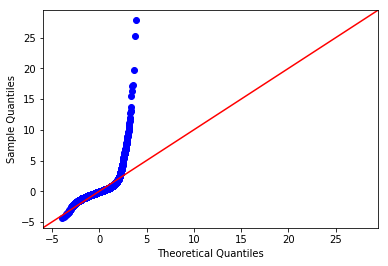

In [56]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

#### Checking for Homoscedasticity
*Check that the errors do not display heteroscedasticity; if errors appear to increase or decrease based on the target variable, then the model does not meet the initial assumptions

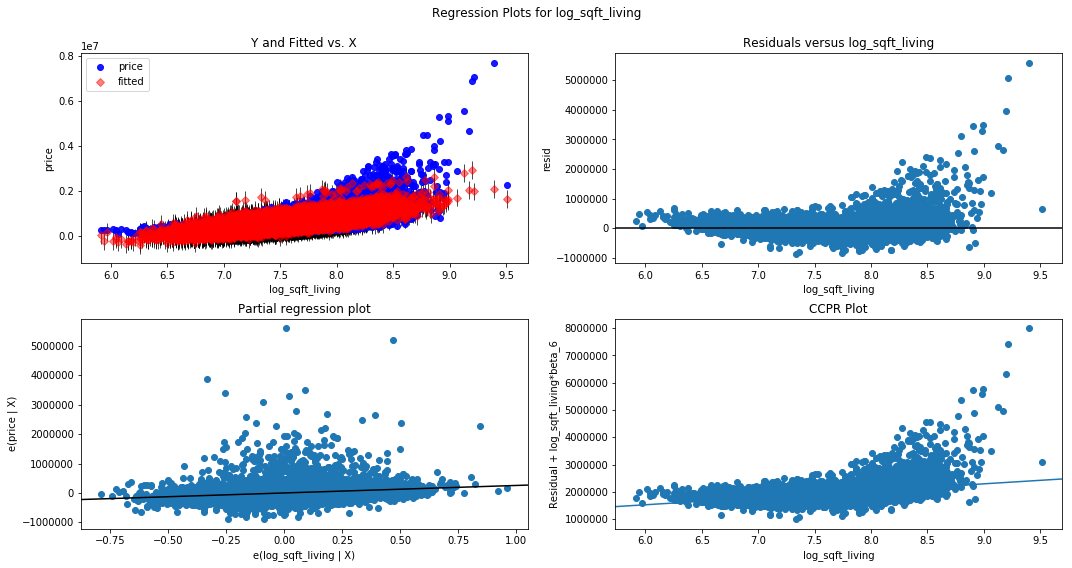

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, 'log_sqft_living', fig=fig)
plt.show()

In [124]:
#not working
#plt.scatter(model_1.predict(df_model_1[predictors]), model_1.resid)
#plt.plot(model_1.predict(df_model_1[predictors]), [0 for i in range(len(df_model_1))])

### Model Refinement
* Tweak & Rerun to Reduce MSE

### Stepwise selection with p-values

* starts with an empty model (which only includes the intercept), and each time, the variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). After adding each new variable in the model, the algorithm will look at the p-values of all the other parameter estimates which were added to the model previously, and remove them if the p-value exceeds a certain value (backward step). The algorithm stops when no variables can be added or removed given the threshold values.

In [125]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [62]:
X = df_model_1.drop('price', axis=1)
y = pd.DataFrame(df_model_1, columns= ["price"])

In [126]:
#NOT WORKING
#result = stepwise_selection(X, y, verbose = True)
#print('resulting features:')
#print(result)

### Recursive Feature Selection

In [58]:
y = df_model_1[["price"]]
X = df_model_1.drop(["price"], axis=1)
X.head()

,bedrooms,bathrooms,floors,grade,log_sqft_living,log_sqft_living15,basement_bool,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1.0,7,7.073270,7.200425,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2.0,7,7.851661,7.432484,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,6,6.646391,7.908387,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,7,7.580700,7.215240,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,8,7.426549,7.495542,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [66]:
r_list = []
adj_r_list = []
list_n = list(range(5,100,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.040337
dtype: float64
price    0.036829
dtype: float64
price    0.107075
dtype: float64
price    0.103811
dtype: float64
price    0.189332
dtype: float64
price    0.186368
dtype: float64
price    0.241604
dtype: float64
price    0.238832
dtype: float64
price    0.282048
dtype: float64
price    0.279424
dtype: float64
price    0.3306
dtype: float64
price    0.328153
dtype: float64
price    0.385897
dtype: float64
price    0.383653
dtype: float64
price    0.698708
dtype: float64
price    0.697607
dtype: float64
price    0.702006
dtype: float64
price    0.700917
dtype: float64
price    0.702006
dtype: float64
price    0.700917
dtype: float64


### Holdout Validation
*How well the model will generalize to new data, i.e. the model learned the patters from the data correctly without taking into consideration the noise

### Train-Test-Split (should do before modeling)

In [60]:
#need to pass random_state?
#need to define X and y
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16913 4229 16913 4229


In [63]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [64]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [65]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 41060024301.508896
Test Mean Squarred Error: 37919474806.4436


### Logging the outcome variable

In [74]:
price_log = pd.DataFrame([])
price_log['price_log'] = np.log(df['price'])

df_model_price_log = pd.DataFrame([])
df_model_price_log = pd.concat([price_log, features], axis=1)
df_model_price_log = df_model_price_log.drop("sqft_living", axis =1)
df_model_price_log = df_model_price_log.drop("sqft_living15", axis =1)
df_model_price_log = df_model_price_log.drop("sqft_basement", axis = 1)
df_model_price_log = df_model_price_log.drop("price", axis = 1)
df_model_price_log = pd.get_dummies(df_model_price_log)
df_model_price_log.head()

,price_log,bedrooms,bathrooms,floors,grade,log_sqft_living,log_sqft_living15,basement_bool,zipcode_98001,zipcode_98002,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309982,3,1.00,1.0,7,7.073270,7.200425,False,0,0,...,0,0,0,0,0,0,1,0,0,0
1,13.195614,3,2.25,2.0,7,7.851661,7.432484,True,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.100712,2,1.00,1.0,6,6.646391,7.908387,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,4,3.00,1.0,7,7.580700,7.215240,True,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,3,2.00,1.0,8,7.426549,7.495542,False,0,0,...,0,0,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18c7d908>]],
      dtype=object)

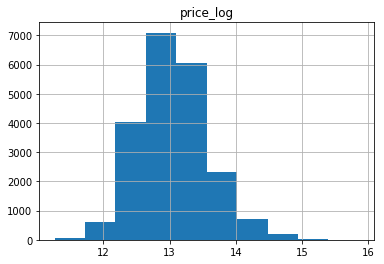

In [151]:
price_log.hist()

### Log of Price Model

In [75]:
#Define the problem
outcome = 'price_log'
predictors = df_model_price_log.drop('price_log', axis=1)

In [76]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_price_log = ols(formula=formula, data=df_model_price_log).fit()
model_price_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1625.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:11:24   Log-Likelihood:                 3918.4
No. Observations:               21142   AIC:                            -7683.
Df Residuals:                   21065   BIC:                            -7070.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.0089      0.050    141.399      0.000       6.912       7.106
basement_bool[T.True]    -0.0488      0.004    -13.379      0.000      -0.056      -0.042
bedrooms                 -0.0229      0.002    -10.868      0.000      -0.027      -0.019
bathrooms                 0.0311      0.003      9.886      0.000       0.025       0.037
floors                   -0.0680      0.004    -18.890      0.000      -0.075      -0.061
grade                     0.1003      0.002     47.450      0.000       0.096       0.104
log_sqft_living           0.4901      0.008     63.671      0.000       0.475       0.505
log_sqft_living15         0.2132      0.007     29.334      0.000       0.199       0.227
zipcode_98001            -0.3914      0.011    -36.446      0.000      -0.412      -0.370
zipcode_98002            -0.3710      0.014    -25.940      0.000      -0.399      -0.343
zipcode_98003            -0.3802      0.012    -31.302      0.000      -0.404      -0.356
zipcode_98004             0.7237      0.012     62.675      0.000       0.701       0.746
zipcode_98005             0.3227      0.016     20.656      0.000       0.292       0.353
zipcode_98006             0.2585      0.009     27.376      0.000       0.240       0.277
zipcode_98007             0.2429      0.017     14.309      0.000       0.210       0.276
zipcode_98008             0.2864      0.012     23.711      0.000       0.263       0.310
zipcode_98010            -0.0929      0.020     -4.604      0.000      -0.132      -0.053
zipcode_98011             0.0166      0.014      1.148      0.251      -0.012       0.045
zipcode_98014            -0.0232      0.018     -1.278      0.201      -0.059       0.012
zipcode_98019            -0.0759      0.015     -5.168      0.000      -0.105      -0.047
zipcode_98022            -0.2530      0.013    -18.985      0.000      -0.279      -0.227
zipcode_98023            -0.4336      0.009    -47.313      0.000      -0.452      -0.416
zipcode_98024             0.1069      0.022      4.761      0.000       0.063       0.151
zipcode_98027             0.1194      0.010     11.717      0.000       0.099       0.139
zipcode_98028             0.0043      0.012      0.352      0.725      -0.019       0.028
zipcode_98029             0.1700      0.012     14.738      0.000       0.147       0.193
zipcode_98030            -0.3614      0.013    -28.440      0.000      -0.386      -0.336
zipcode_98031            -0.3288      0.012    -26.644      0.000      -0.353      -0.305
zipcode_98032            -0.3967      0.018    -22.031      0.000      -0.432      -0.361
zipcode_98033             0.3945      0.010     40.078      0.000       0.375       0.414
zipcode_98034             0.1486      0.009     16.963      0.000       0.131       0.166
zipcode_98038          

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

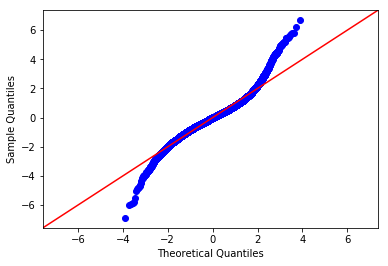

In [77]:
fig = sm.graphics.qqplot(model_price_log.resid, dist=stats.norm, line='45', fit=True)

In [78]:
X = df_model_price_log.drop('price_log', axis=1)
y = pd.DataFrame(df_model_price_log, columns= ["price_log"])

### Train-Test-Split (should do before modeling)

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [81]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16913 4229 16913 4229


In [82]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [83]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [84]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.04017110830710072
Test Mean Squarred Error: 0.041618569341029574


Conclusions for Log of Price Model:
    * some zipcodes impact price, others do not
    * basement_bool, bedrooms, bathrooms, floors, grade, sqft_living, sqft_living15 all show a statistically significant relationship with log of price (pvalue < 0.05), however some are negative, which is counterintuitive and difficult to interpret.

### Model with Latitude instead of zipcode

In [169]:
df_model_price_log_lat = pd.DataFrame([])
df_model_price_log_lat = pd.concat([price_log, features, df.lat], axis=1)
df_model_price_log_lat = df_model_price_log_lat.drop("price", axis = 1)
df_model_price_log_lat = df_model_price_log_lat.drop("zipcode", axis = 1)
df_model_price_log_lat = df_model_price_log_lat.drop("sqft_living", axis = 1)
df_model_price_log_lat = df_model_price_log_lat.drop("sqft_living15", axis = 1)
df_model_price_log_lat = df_model_price_log_lat.drop("sqft_basement", axis = 1)
df_model_price_log_lat.head()

,price_log,bedrooms,bathrooms,floors,grade,log_sqft_living,log_sqft_living15,basement_bool,lat
0,12.309982,3,1.00,1.0,7,7.073270,7.200425,False,47.5112
1,13.195614,3,2.25,2.0,7,7.851661,7.432484,True,47.7210
2,12.100712,2,1.00,1.0,6,6.646391,7.908387,False,47.7379
3,13.311329,4,3.00,1.0,7,7.580700,7.215240,True,47.5208
4,13.142166,3,2.00,1.0,8,7.426549,7.495542,False,47.6168


In [170]:
#Define the problem
outcome = 'price_log'
predictors = df_model_price_log_lat.drop('price_log', axis=1)

In [171]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_price_log_lat = ols(formula=formula, data=df_model_price_log_lat).fit()
model_price_log_lat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     6380.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:40:27   Log-Likelihood:                -3459.2
No. Observations:               21142   AIC:                             6936.
Df Residuals:                   21133   BIC:                             7008.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -61.5511      0.694    -88.675      0.000     -62.912     -60.191
basement_bool[T.True]     0.0717      0.005     15.316      0.000       0.063       0.081
bedrooms                 -0.0217      0.003     -7.405      0.000      -0.027      -0.016
bathrooms                 0.0104      0.004      2.374      0.018       0.002       0.019
floors                    0.0021      0.005      0.434      0.664      -0.007       0.011
grade                     0.1555      0.003     54.281      0.000       0.150       0.161
log_sqft_living           0.3737      0.011     35.062      0.000       0.353       0.395
log_sqft_living15         0.2077      0.010     21.548      0.000       0.189       0.227
lat                       1.4516      0.015     99.997      0.000       1.423       1.480
==============================================================================
Omnibus:                      720.295   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              942.122
Skew:                           0.380   Prob(JB):                    2.63e-205
Kurtosis:                       3.702   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

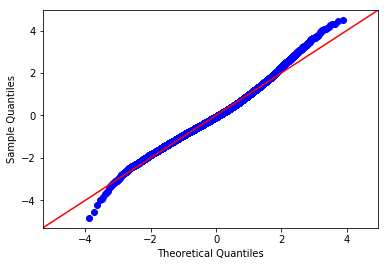

In [172]:
fig = sm.graphics.qqplot(model_price_log_lat.resid, dist=stats.norm, line='45', fit=True)

In [173]:
X = df_model_price_log_lat.drop('price_log', axis=1)
y = pd.DataFrame(df_model_price_log_lat, columns= ["price_log"])

### Train-Test-Split (should do before modeling)

In [174]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [176]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16913 4229 16913 4229


In [177]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [178]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [179]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0810840131487693
Test Mean Squarred Error: 0.08179001695553133


Conclusions:
    
R^2 went down, and MSE went slightly up, but Q-Q plot looks much better

Interestingly, floors is no longer significant (pvalue = 0.664)

#### Let's rerun it taking the log of latitude so that it is more normal and let's drop floors

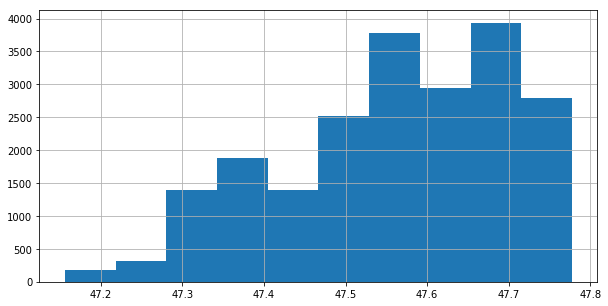

In [187]:
df_model_price_log_lat["lat"].hist(figsize = [10,5]);

In [188]:
lat_log = pd.DataFrame([])
lat_log['lat_log'] = np.log(df['lat'])

df_model_price_log_lat_nofloors = pd.DataFrame([])
df_model_price_log_lat_nofloors = pd.concat([price_log, features, lat_log], axis=1)

to_drop = ["price", "zipcode", "sqft_living", "sqft_living15", "sqft_basement", "floors"]
df_model_price_log_lat_nofloors = df_model_price_log_lat_nofloors.drop(to_drop, axis = 1)

df_model_price_log_lat_nofloors.head()

,price_log,bedrooms,bathrooms,grade,log_sqft_living,log_sqft_living15,basement_bool,lat_log
0,12.309982,3,1.00,7,7.073270,7.200425,False,3.860965
1,13.195614,3,2.25,7,7.851661,7.432484,True,3.865372
2,12.100712,2,1.00,6,6.646391,7.908387,False,3.865726
3,13.311329,4,3.00,7,7.580700,7.215240,True,3.861168
4,13.142166,3,2.00,8,7.426549,7.495542,False,3.863186


In [189]:
df_model_price_log_lat_nofloors.describe()

,price_log,bedrooms,bathrooms,grade,log_sqft_living,log_sqft_living15,lat_log
count,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000
mean,13.048412,3.371157,2.116096,7.658310,7.551057,7.539832,3.861993
std,0.526662,0.902213,0.768545,1.174272,0.424029,0.327436,0.002916
min,11.264464,1.000000,0.500000,3.000000,5.913503,5.988961,3.853459
25%,12.682307,3.000000,1.750000,7.000000,7.265430,7.306531,3.860124
50%,13.017003,3.000000,2.250000,7.000000,7.554859,7.517521,3.862244
75%,13.377006,4.000000,2.500000,8.000000,7.843849,7.766417,3.864474
max,15.856731,11.000000,8.000000,13.000000,9.513404,8.733916,3.866557


/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


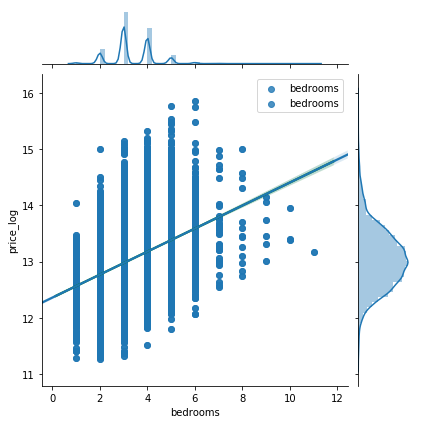

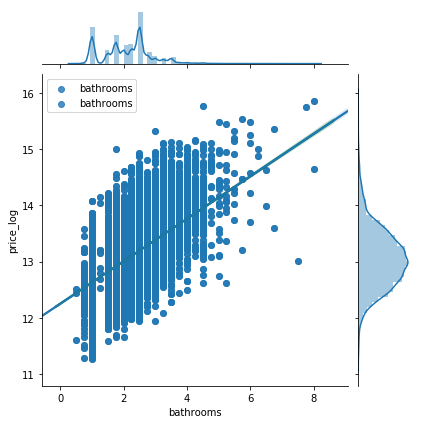

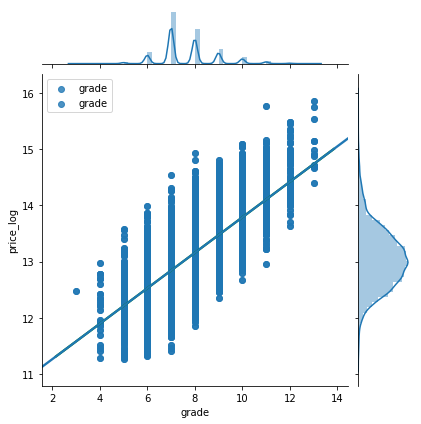

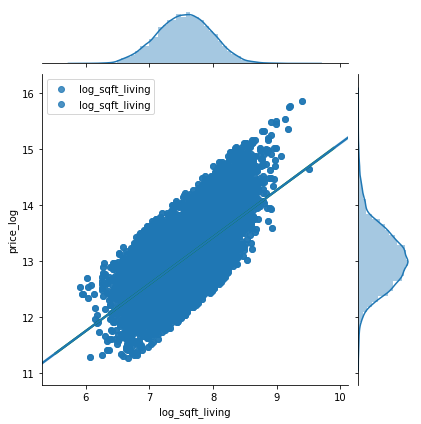

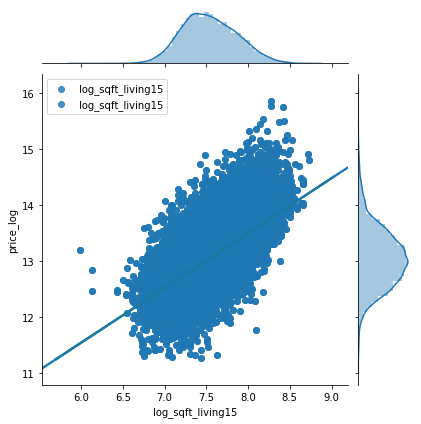

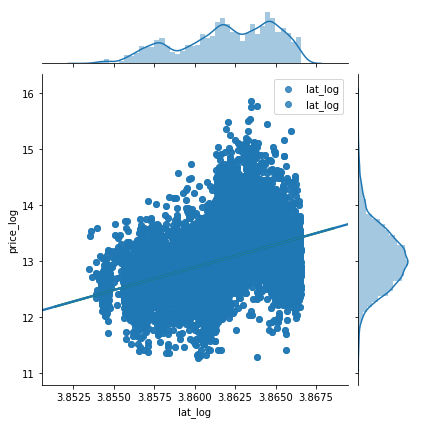

In [195]:
for column in ['bedrooms', 'bathrooms', 'grade', 'log_sqft_living', 'log_sqft_living15', 'lat_log']:
    sns.jointplot(x=column, y="price_log",
                 data=df_model_price_log_lat_nofloors,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df_model_price_log_lat_nofloors[column], df_model_price_log_lat_nofloors.price_log, label=column)
    plt.legend()
    plt.show()

### Recursive Feature Selection

In [58]:
y = df_model_1[["price"]]
X = df_model_1.drop(["price"], axis=1)
X.head()

,bedrooms,bathrooms,floors,grade,log_sqft_living,log_sqft_living15,basement_bool,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1.0,7,7.073270,7.200425,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2.0,7,7.851661,7.432484,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,6,6.646391,7.908387,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,7,7.580700,7.215240,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,8,7.426549,7.495542,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [66]:
r_list = []
adj_r_list = []
list_n = list(range(5,100,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.040337
dtype: float64
price    0.036829
dtype: float64
price    0.107075
dtype: float64
price    0.103811
dtype: float64
price    0.189332
dtype: float64
price    0.186368
dtype: float64
price    0.241604
dtype: float64
price    0.238832
dtype: float64
price    0.282048
dtype: float64
price    0.279424
dtype: float64
price    0.3306
dtype: float64
price    0.328153
dtype: float64
price    0.385897
dtype: float64
price    0.383653
dtype: float64
price    0.698708
dtype: float64
price    0.697607
dtype: float64
price    0.702006
dtype: float64
price    0.700917
dtype: float64
price    0.702006
dtype: float64
price    0.700917
dtype: float64


### Recursive Feature Selection

In [58]:
y = df_model_1[["price"]]
X = df_model_1.drop(["price"], axis=1)
X.head()

,bedrooms,bathrooms,floors,grade,log_sqft_living,log_sqft_living15,basement_bool,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1.0,7,7.073270,7.200425,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2.0,7,7.851661,7.432484,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,6,6.646391,7.908387,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,7,7.580700,7.215240,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,8,7.426549,7.495542,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [66]:
r_list = []
adj_r_list = []
list_n = list(range(5,100,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.040337
dtype: float64
price    0.036829
dtype: float64
price    0.107075
dtype: float64
price    0.103811
dtype: float64
price    0.189332
dtype: float64
price    0.186368
dtype: float64
price    0.241604
dtype: float64
price    0.238832
dtype: float64
price    0.282048
dtype: float64
price    0.279424
dtype: float64
price    0.3306
dtype: float64
price    0.328153
dtype: float64
price    0.385897
dtype: float64
price    0.383653
dtype: float64
price    0.698708
dtype: float64
price    0.697607
dtype: float64
price    0.702006
dtype: float64
price    0.700917
dtype: float64
price    0.702006
dtype: float64
price    0.700917
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22715e80>]],
      dtype=object)

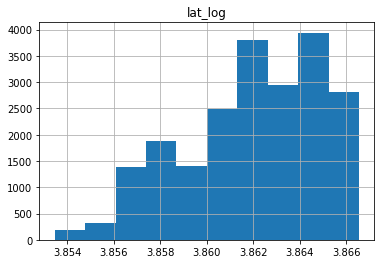

In [184]:
lat_log.hist()

### Recursive Feature Selection

In [58]:
y = df_model_1[["price"]]
X = df_model_1.drop(["price"], axis=1)
X.head()

,bedrooms,bathrooms,floors,grade,log_sqft_living,log_sqft_living15,basement_bool,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1.0,7,7.073270,7.200425,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2.0,7,7.851661,7.432484,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,6,6.646391,7.908387,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,7,7.580700,7.215240,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,8,7.426549,7.495542,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Recursive Feature Selection

In [58]:
y = df_model_1[["price"]]
X = df_model_1.drop(["price"], axis=1)
X.head()

,bedrooms,bathrooms,floors,grade,log_sqft_living,log_sqft_living15,basement_bool,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1.0,7,7.073270,7.200425,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2.0,7,7.851661,7.432484,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,6,6.646391,7.908387,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,7,7.580700,7.215240,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,8,7.426549,7.495542,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [66]:
r_list = []
adj_r_list = []
list_n = list(range(5,100,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.040337
dtype: float64
price    0.036829
dtype: float64
price    0.107075
dtype: float64
price    0.103811
dtype: float64
price    0.189332
dtype: float64
price    0.186368
dtype: float64
price    0.241604
dtype: float64
price    0.238832
dtype: float64
price    0.282048
dtype: float64
price    0.279424
dtype: float64
price    0.3306
dtype: float64
price    0.328153
dtype: float64
price    0.385897
dtype: float64
price    0.383653
dtype: float64
price    0.698708
dtype: float64
price    0.697607
dtype: float64
price    0.702006
dtype: float64
price    0.700917
dtype: float64
price    0.702006
dtype: float64
price    0.700917
dtype: float64


In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [66]:
r_list = []
adj_r_list = []
list_n = list(range(5,100,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.040337
dtype: float64
price    0.036829
dtype: float64
price    0.107075
dtype: float64
price    0.103811
dtype: float64
price    0.189332
dtype: float64
price    0.186368
dtype: float64
price    0.241604
dtype: float64
price    0.238832
dtype: float64
price    0.282048
dtype: float64
price    0.279424
dtype: float64
price    0.3306
dtype: float64
price    0.328153
dtype: float64
price    0.385897
dtype: float64
price    0.383653
dtype: float64
price    0.698708
dtype: float64
price    0.697607
dtype: float64
price    0.702006
dtype: float64
price    0.700917
dtype: float64
price    0.702006
dtype: float64
price    0.700917
dtype: float64


In [165]:
#Define the problem
outcome = 'price_log'
predictors = df_model_price_log_lat_nofloors.drop('price_log', axis=1)

In [166]:
#fitting model
predictors = '+'.join(predictors)
formula = outcome + "~" + predictors
model_price_log_lat_nofloors = ols(formula=formula, data=df_model_price_log_lat_nofloors).fit()
model_price_log_lat_nofloors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     7297.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:38:54   Log-Likelihood:                -3453.2
No. Observations:               21142   AIC:                             6922.
Df Residuals:                   21134   BIC:                             6986.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -259.2159      2.657    -97.545      0.000    -264.425    -254.007
basement_bool[T.True]     0.0708      0.004     16.461      0.000       0.062       0.079
bedrooms                 -0.0218      0.003     -7.465      0.000      -0.027      -0.016
bathrooms                 0.0111      0.004      2.711      0.007       0.003       0.019
grade                     0.1557      0.003     55.213      0.000       0.150       0.161
log_sqft_living           0.3741      0.011     35.164      0.000       0.353       0.395
log_sqft_living15         0.2071      0.010     21.710      0.000       0.188       0.226
lat_log                  69.0597      0.688    100.443      0.000      67.712      70.407
==============================================================================
Omnibus:                      719.069   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              940.740
Skew:                           0.379   Prob(JB):                    5.26e-205
Kurtosis:                       3.702   Cond. No.                     2.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Checking for Normality
* Ensure that our residuals are normally distributed with a Q-Q plot

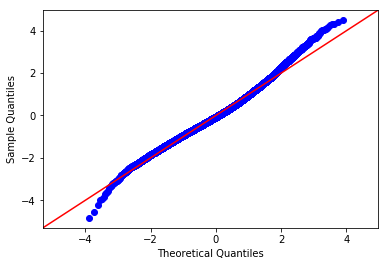

In [167]:
fig = sm.graphics.qqplot(model_price_log_lat_nofloors.resid, dist=stats.norm, line='45', fit=True)

In [128]:
X = df_model_price_log_lat_nofloors.drop('price_log', axis=1)
y = pd.DataFrame(df_model_price_log_lat_nofloors, columns= ["price_log"])

### Train-Test-Split (should do before modeling)

In [129]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [131]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16913 4229 16913 4229


In [132]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [133]:
#look at the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [134]:
#compare MSE of train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.08091080295061867
Test Mean Squarred Error: 0.08246018878614216


Conclusions:
    
No change in R^2, very little change in MSE, and Q-Q plot looks the same

At least now all of our predictors are significant.

Perhaps I should have standardized my features...

#### Min-max scaling
When performing min-max scaling, you can transform x to get the transformed  x′x′  by using the formula:

x′=(x−min(x))/(max(x)−min(x))
 
This way of scaling brings values between 0 and 1

#### Standardization
When

x′=(x−xbar)/σ
 
x' will have mean  μ=0  and  σ=1
Note that standardization does not make data more normal, it will just change the mean and the standard error!

#### Mean normalization
When performing mean normalization, you use the following formula:
x′=(x−mean(x))/(max(x)−min(x))
 
The distribution will have values between -1 and 1, and a mean of 0.

In [159]:
#min-max scaling so predictors are between 0 and 1

bedrooms = df["bedrooms"]

scaled_bedrooms = (bedrooms-min(bedrooms))/(max(bedrooms)-min(bedrooms))

df_scaled = pd.DataFrame([])
df_scaled["bedrooms_scaled"] = scaled_bedrooms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ccdde80>]],
      dtype=object)

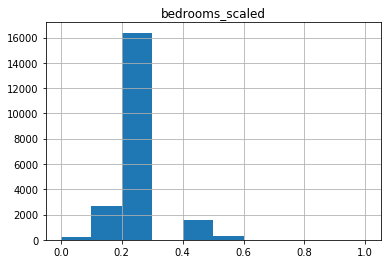

In [160]:
df_scaled.hist()

In [185]:
sqrt_sqft_basement = pd.DataFrame([])
sqrt_sqft_basement['sqrt_sqft_basement'] = np.sqrt(features['sqft_basement'])

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f6e2cc0>]],
      dtype=object)

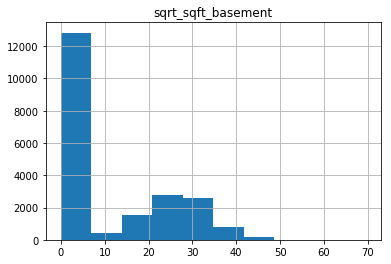

In [186]:
sqrt_sqft_basement.hist()

## Interpret & Visualize

* Draw conclusions from data, evaluate meaning of results, communicate the findings through visualizations

* log price - one "unit" change in predictor leads to 1% change in log price?

## Future Directions

* There's likely a lot that could be done with the latitude and longitude variables (proximity to work, located in a good school district, proximity to public transportation, close - but not too close - to a highway/main road...)
* Maybe dig into yr_built in relation to renovated? If "X" many years old, can increase price "X" much if you renovate? diff between yr_built and yr_reno
* what is "grade" really about? This is a very important feature in predicting price